# TD n°4

**Objectifs**

Continuer à pratiquer les séquences, les fichiers et bien sûr réfléchir sur la modélisation de petits problèmes.

## Parlez amis, et entrez...

### Énigme

Vous vous trouvez devant une mystérieuse porte. Chaque fois que vous pressez une des runes se trouvant sur le côté, celle-ci semble se dupliquer et venir se positionner en haut de la porte... mais rien d'autre ne semble se passer. Comment ouvrir cette porte ?


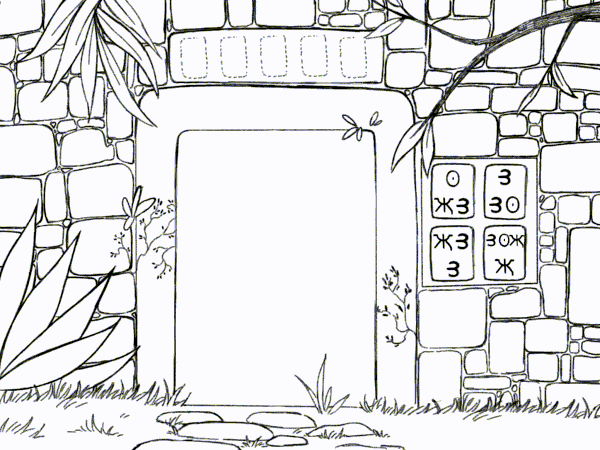

Vous ne trouvez pas ? Cette vidéo vous donnera la solution : [la solution en vidéo](https://www.youtube.com/watch?v=d2q9ezBUbTc)

### Modélisation

#### Le jeu de runes

**Q1** Proposer une modélisation des runes de l'énigme d'introduction. Voici les caractères unicode (utf-8) présents sur les runes : ʘ Җ Յ. Inspirez-vous de la numérotation des runes proposée dans l'image ci-dessous :

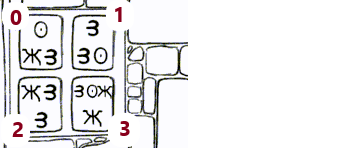

In [ ]:
# Ici votre constante pour modéliser les runes de l'énigme

R1 = 

**Q2** quelle est la chaîne de caractères que vous obtenez pour ouvrir la porte de l'énigme ?

In [ ]:
# votre solution ici

SOL1 = 

### La validation d'une combinaison de runes

Vous l'avez vu (ou pas), une combinaison de runes forment deux mots, l'un en haut qu'on appelle `haut` et l'autre en bas qu'on appelle `bas`.

Prenons par exemple les runes suivantes :

``` 
   Rune 0    Rune 1     Rune 2
   -----     ------     -----
    ԹԹ        ԽԹ        Թ  
    Թ         ԹԽ        ԹԹ  
   -----     ------     -----
```

Alors la combinaison 010 donne les mots suivants :

- `haut` vaut `ԹԹԽԹԹԹ` 
- `bas` vaut `ԹԹԽԹ`

**Q3** Proposer une fonction `combinaison` qui prend en paramètres la modélisation d'un jeu de runes et une combinaison de runes et qui retourne le tuple formés des deux mots `haut` et `bas`. La combinaison de runes sera donnée sous la forme d'une chaîne de caractères (on suppose qu'il n'y a jamais plus de 10 runes; elles sont numérotées de 0 à 9). Dans l'exemple ci-dessus la combinaison est `'010'`.

In [ ]:
# ici votre fonction

On dit qu'une combinaison est **valide** si les mots `haut` et `bas` formés sont identiques. Une approche naïve pour résoudre la validité serait de former les mots puis de tester leur égalité. 

Que dire de la combinaison qui commence ainsi `'1...'` suivi de 1 000 000 de runes ?

**Q4** Écrire une fonction `valide` _intelligente_ qui prend la modélisation des runes en paramètres ainsi qu'une combinaison et qui retourne un triplet constitué : 
    
- d'un booléen qui vaut `True` si la combinaison est valide et `False` sinon
- du mot `haut` si la combinaison est valide ou la partie du mot jusqu'à la première rune qui a fait échouer le test de validité sinon
- du mot `bas` si la combinaison est valide ou la partie du mot jusqu'à la première rune qui a fait échouer le test de validité sinon


In [ ]:
# ici votre fonction

#### Tests

Compléter les jeux de runes suivants puis essayer de valider les tests. `R1` sera le jeu de runes de l'énigme de l'introduction et `R2` celui de l'exemple d'après. **Attention** dans les test suivants, il faudra veillez à avoir numéroté les runes comme je l'ai fait.

In [ ]:
# Vos jeux de runes

R1 = 
R2 = 

**Tester la fonction `valide` avec `R2`**

In [ ]:
assert valide(R2, '02') == (True, 'ԹԹԹ', 'ԹԹԹ'), "Echec test 1"
assert valide(R2, '012') == (True, 'ԹԹԽԹԹ', 'ԹԹԽԹԹ'), "Echec test 2"
assert valide(R2, '00') == (False, 'ԹԹԹԹ', 'ԹԹ'), "Echec test 3"
assert valide(R2, '111') == (False, 'ԽԹ', 'ԹԽ'), "La validation s'arrête à la première rune"
print("Bravo, tests validés")

**Tester la fonction `valide` avec les runes de l'énigme**

In [ ]:
assert valide(R1, '01') == (False, 'ʘ', 'ҖՅ'), "Echec test R1-1"
assert valide(R1, SOL1) == (True, 'ՅʘҖՅՅՅʘҖ', 'ՅʘҖՅՅՅʘҖ'), "Solution de l'énigme"
print("Bravo, tests validés")

### Histoire

L'énigme est connue sous le nom de **problème de correspondance de Post** du nom de son inventeur Émile Post en 1946 : dans cet [article](https://www.ams.org/journals/bull/1946-52-04/S0002-9904-1946-08555-9/S0002-9904-1946-08555-9.pdf), Émile Post montre que ce problème est indécidable. c'est-à-dire qu'il n'existe pas de programme qui, dans le cas général, réponde oui ou non à l'existence d'une solution.

L'étape suivante consisterait à écrire un programme qui permette de résoudre une instance du problème. Dans cet article : https://webdocs.cs.ualberta.ca/~mmueller/ps/jea.pdf l'auteur décrit quelques techniques pour rendre la recherche plus rapide. Cela pourrait faire le sujet d'un petit projet pour le 2e semestre.

> Merci à Raphaëlle pour les dessins animés  

## Échec et mat

Cet exercice est issu du concours Prologin, année 2013 : [accéder au sujet original](https://prologin.org/train/2013/semifinal/echec_et_mat).

Aux échecs, la reine est une pièce majeure, qui se déplace d'un nombre quelconque de cases, en ligne, en colonne ou en diagonale. Une pièce est dite **en prise** si elle se trouve sur l'une des cases atteignables par la reine. Ci-dessous, un exemple qui montre une reine ainsi que les cases qu'elle peut atteindre (en rouge) :

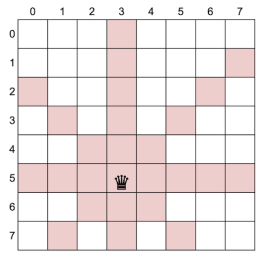

**Le problème** 

Soient $n$ reines ($1\leq n\leq 64$), positionnées sur un échiquier 8x8, combien reste-t-il de cases _paisibles_ c'est-à-dire en prise par aucune des reines ?

## Modéliser le problème

### La grille

On modélise une case libre par le caractère point `'.'` et une case occupée par une reine par le caractère `'R'`. 

**Q1** Donnez la chaîne de caractères qui modélise la ligne n°5 de l'exemple précédent.

In [ ]:
# donnez votre réponse ici
L5 = 

On se propose de stocker dans un fichier texte la modélisation d'une grille entière 8x8. Soit la configuration suivante :

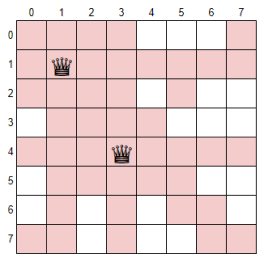

**Q2** Donner le fichier texte qui correspond à cette configuration.

**Q3** Écrire une fonction `lecture_grille` qui prend un nom de fichier en paramètre (ce fichier sera une configuration de grille) et renvoie une liste de listes de caractères.

In [ ]:
# votre fonction ici


### La résolution

Pour compter les cases paisibles, on a le choix entre deux algorithmes assez proches :

**Algorithme 1 : tout marquer puis compter**

1. parcourir toutes les cases, si on tombe sur une reine, on marque la ligne et la colonne de cette reine ainsi que les deux diagonales
2. parcourir toutes les cases, compter celles qui ne sont pas marquées.

**Algorithme 2 : marquer et compter**

1. parcourir les cases, si on tombe sur une reine on compte une case prise de plus et à partir de cette reine, on va explorer les cases dans chacune des 8 directions, marquer et compter uniquement les cases libres croisées
2. on soustrait de 64 le total de cases qu'on a précédemment comptabilisées

**Q4** Quel est l'avantage du 2e algorithme sur le premier ?

Ci-dessous le début de la modélisation des directions.

**Q5** Essayez de comprendre à quoi correspond cette modélisation puis complétez la.

In [ ]:
# compléter ce tuple de couples pour avoir les 8 directions possibles

DIRECTIONS = (-1, 0), (-1, 1), (0, 1), ...

L'algorithme qui à partir d'une case repérée par son numéro de ligne `lig` et son numéro de colonne `col` est le suivant :

- on initialise 0 le nombre de cases marquées
- pour chacune des 8 directions :
    - on avance d'une case dans la direction
    - tant que la case est dans les limites de l'échiquier :
        - si la case est libre on la marque et on incrémente de 1 notre comptage des marquées
        - on passe à la case suivante (on avance de 1 case dans la direction)


**Q6** Écrire une fonction `inside` qui prend un numéro de ligne et un numéro de colonne et qui renvoie `True` si et seulement si la case est bien dans l'échiquier.

In [ ]:
# votre fonction ici


**Q7** Écrire la fonction `marque_et_compte` qui réalise l'algorithme ci-dessus.

In [ ]:
# votre fonction ici

**Q8** Finaliser le programme qui demande à l'utilisateur le nom d'un fichier-grille et affiche le nombre de cases paisibles de cette grille.

In [ ]:
# votre solution ici (vous pouvez rajouter une fonction intermédiaire)
